In [106]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()
import Pkg; Pkg.add("RobotZoo")
import Pkg; Pkg.add("CoordinateTransformations")
import Pkg; Pkg.add("CDDLib")
import Pkg; Pkg.add("Colors")
import Pkg; Pkg.add("RobotDynamics")
# import Pkg; Pkg.add("MatrixCalculus")

  Activating environment at `~/Projects/OCRL-Project-/Project.toml`
   Resolving package versions...
  No Changes to `~/Projects/OCRL-Project-/Project.toml`
  No Changes to `~/Projects/OCRL-Project-/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Projects/OCRL-Project-/Project.toml`
  No Changes to `~/Projects/OCRL-Project-/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Projects/OCRL-Project-/Project.toml`
  No Changes to `~/Projects/OCRL-Project-/Manifest.toml`
   Resolving package versions...
    Updating `~/Projects/OCRL-Project-/Project.toml`
  [5ae59095] + Colors v0.12.10
  No Changes to `~/Projects/OCRL-Project-/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Projects/OCRL-Project-/Project.toml`
  No Changes to `~/Projects/OCRL-Project-/Manifest.toml`


In [ ]:
using LinearAlgebra
using PyPlot
using ForwardDiff
using RobotZoo
using RobotDynamics
using MatrixCalculus
using Plots

In [7]:
tt_model = RobotZoo.Acrobot()

LoadError: UndefVarError: RobotZoo not defined

In [102]:
# Defining the map
map_width = 15
map_height = 15

# Create a grid of points representing the map
map_grid = zeros(Float64, map_height, map_width);

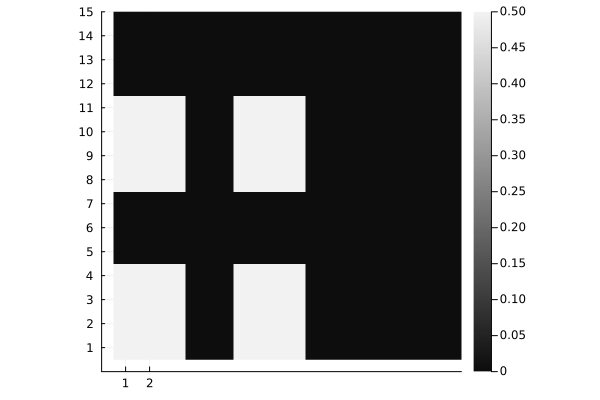

In [103]:
# Defining Obstacles

# Obstacles for visualization are defined as a list of tuples, where each tuple is of the form (min_x, max_x, min_y, max_y)
obstacles_vis = [
    (1, 3, 1, 4),
    (1, 3, 8, 11),
    (6, 8, 1, 4),
    (6, 8, 8, 11)
]

# Obstacles for control are define by circles embeded inside each obstacle
obstacles_ctrl = [
    [(1, 1, 1.0)],
    [(1, 8, 1.0)],
    [(6, 1, 1.0)],
    [(6, 8, 1.0)]
]

# Visualizing the above Obstacles using a Plot

# set the obstacles in the grid to a value of 1
for obs in obstacles_vis
    for i in obs[3]:obs[4]
        for j in obs[1]:obs[2]
            map_grid[i, j] = 0.5
        end
    end
end

# Plot circles for the control obstacles using heatmap
# for obs in obstacles_ctrl
#     for (x, y, r) in obs
#         for i in 1:map_height
#             for j in 1:map_width
#                 if (i - y)^2 + (j - x)^2 <= r^2
#                     map_grid[i, j] = 1.0
#                 end
#             end
#         end
#     end
# end

# plot the parking lot
heatmap(map_grid, color=:grays, aspect_ratio=1, xlims=(0.0, map_width), ylims=(0.0, map_height), xticks=1:width, yticks=1:map_height)

In [104]:
using MeshCat
using GeometryTypes
using CoordinateTransformations

# create a new visualizer object
vis = Visualizer()

# define the obstacles as a list of tuples
obstacles_vis = [
    (1, 3, 1, 4),
    (1, 3, 8, 11),
    (6, 8, 1, 4),
    (6, 8, 8, 11)
]
# iterate through the obstacles and create a HyperRectangle object for each one
for (i, obs) in enumerate(obstacles_vis)
    min_x, max_x, min_y, max_y = obs
    width = max_x - min_x
    height = max_y - min_y
    pos_x = min_x + width/2
    pos_y = min_y + height/2
    cube = HyperRectangle(Vec(pos_x, pos_y, 0), Vec(width, height, 1))
    setobject!(vis[Symbol("cube", i)], cube)
    settransform!(vis[Symbol("cube", i)], Translation(-0.5, -0.5, 0))
end



# render the scene
render(vis)

# Defining the robot model



┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
└ http://127.0.0.1:8726


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("cube2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x63, 0x75, 0x62, 0x65, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x63, 0x75, 0x62, 0x65, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "cube1" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x63, 0x75, 0x62, 0x65, 0x31], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x63, 0x75, 0x62, 0x65, 0x31], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "cube4" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x63, 0x75, 0x62, 0x65, 0x34], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x63, 0x75, 0x62, 0x65, 0x34], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "cube3" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x63, 0x75, 0x62, 0x65, 0x33], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x63, 0x75, 0x62, 0x65, 0x33], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))))), Set{Any}(), ip"127.0.0.1", 8726))

In [107]:
using MeshCat
using CoordinateTransformations
using Colors

# create a new visualizer object
vis = Visualizer()

# create the trailer body as a box
trailer_body = HyperRectangle(Vec(0, 0, 0), Vec(2, 1, 0.5))
setobject!(vis["trailer_body"], trailer_body, color=RGB(0.5, 0.5, 0.5))

# create the tractor cab as a box
tractor_cab = HyperRectangle(Vec(-1, 0, 0.5), Vec(1, 1, 0.5))
setobject!(vis["tractor_cab"], tractor_cab, color=RGB(0.8, 0.8, 0.8))

# create the tractor wheels as cylinders
wheel1 = Cylinder(Point(1.5, -0.5, 0), Point(1.5, -0.5, -0.2), 0.2)
setobject!(vis["wheel1"], wheel1, color=RGB(0.2, 0.2, 0.2))
wheel2 = Cylinder(Point(1.5, 0.5, 0), Point(1.5, 0.5, -0.2), 0.2)
setobject!(vis["wheel2"], wheel2, color=RGB(0.2, 0.2, 0.2))
wheel3 = Cylinder(Point(-1.5, -0.5, 0), Point(-1.5, -0.5, -0.2), 0.2)
setobject!(vis["wheel3"], wheel3, color=RGB(0.2, 0.2, 0.2))
wheel4 = Cylinder(Point(-1.5, 0.5, 0), Point(-1.5, 0.5, -0.2), 0.2)
setobject!(vis["wheel4"], wheel4, color=RGB(0.2, 0.2, 0.2))

# set the initial transformation of the trailer body
settransform!(vis["trailer_body"], Translation(-3, 0, 0))

# set the initial transformation of the tractor cab
settransform!(vis["tractor_cab"], Translation(1, 0, 0))

# set the initial transformation of the wheels
settransform!(vis["wheel1"], Translation(1.5, -0.5, 0))
settransform!(vis["wheel2"], Translation(1.5, 0.5, 0))
settransform!(vis["wheel3"], Translation(-1.5, -0.5, 0))
settransform!(vis["wheel4"], Translation(-1.5, 0.5, 0))

# render the scene
render(vis)

┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
└ http://127.0.0.1:8727


LoadError: MethodError: no method matching setobject!(::Visualizer, ::Rect3{Float64}; color=RGB{Float64}(0.5,0.5,0.5))
[0mClosest candidates are:
[0m  setobject!(::AbstractVisualizer, ::GeometryLike) at /Users/shrijitsingh99/.julia/packages/MeshCat/QqqKF/src/abstract_visualizer.jl:21[91m got unsupported keyword argument "color"[39m
[0m  setobject!(::AbstractVisualizer, ::GeometryLike, [91m::AbstractMaterial[39m) at /Users/shrijitsingh99/.julia/packages/MeshCat/QqqKF/src/abstract_visualizer.jl:29[91m got unsupported keyword argument "color"[39m
[0m  setobject!(::Visualizer, [91m::AbstractObject[39m) at /Users/shrijitsingh99/.julia/packages/MeshCat/QqqKF/src/visualizer.jl:199[91m got unsupported keyword argument "color"[39m